<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=8>
Introduction to Machine Learning <br>
<font color=696880 size=5>
<!-- <br> -->
Computer Engineering Department
<br>
Sharif University of Technology

<font color=696880 size=5>
<br>
CE 40477 - Fall 2024

<font color=GREEN size=5>
<br>
Mahan Bayhaghi & Nikan Vasei
<!-- <br> -->

____

# Ensemble Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Decision Tree Classifier

### Quick Review
- **Decision Tree** is a `supervised` machine learning model used for both classification and regression tasks.
- It models decisions based on features by splitting the dataset into smaller subsets.
- Each `node` in the tree represents a `feature`, and `edges` represent the `decision` based on a feature's value. 
- The goal is to create a model that predicts the value of a target variable by learning `decision rules` from the features.

### How it works
- A decision tree recursively splits the data into two or more homogeneous sets based on the `most significant attribute`. The splitting is guided by various metrics, like `Information Gain (IG)` or `Gini Impurity`.

### Methods of Decision Trees
1. **Information Gain (IG)**
    - Information gain measures the reduction in entropy (uncertainty) after a dataset is split on a feature.
    - Entropy is calculated as: 
    $$
    Entropy(S) = - \sum p(x)log_2p(x)
    $$
    - The higher the information gain, the better the feature is at splitting the data.

2. **Gini Impurity**
    - Measures the likelihood of an incorrect classification if a random sample is classified based on the distribution of labels.
    - Gini impurity is calculated as:
    $$
    Gini(S) = 1 - \sum p(x)^2
    $$
    - Lower Gini values indicate purer splits.

### Steps to Create a Decision Tree
1. **Select the Best Feature**: The dataset is split based on a feature that provides the best separation.
2. **Calculate Entropy or Gini**: These metrics help determine how pure the subsets are.
3. **Recursively Split**: The tree splits the dataset recursively until a stopping condition is met (like max depth or min samples).
4. **Assign Labels**: Once the tree reaches the leaf nodes, it assigns a predicted class label.


*Below we're going to use the IG method to implement a Decision Stump (Decision Tree with max_depth = 1) class from scratch.*

In [2]:
class DecisionStump:
    """
    A decision stump classifier for multi-class classification problems (depth = 1).
    """
    
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.value_left = None
        self.value_right = None

    def fit(self, X, y):
        """
        Fits a decision stump to the dataset (X, y).
        """
        best_gain = -1
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]
                if len(left_y) and len(right_y):
                    left_weight = len(left_y) / len(y)
                    right_weight = 1 - left_weight
                    gain = self._entropy(y) - (left_weight * self._entropy(left_y) + right_weight * self._entropy(right_y))
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = feature_index
                        self.threshold = threshold
                        self.value_left = np.bincount(left_y).argmax()
                        self.value_right = np.bincount(right_y).argmax()

    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        return np.where(X[:, self.feature] <= self.threshold, self.value_left, self.value_right)

    def _entropy(self, y):
        """
        Computes entropy for a set of labels.
        """
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

In this section, we'll use the `Iris plants` dataset which is a binary classification dataset.

**Dataset Characteristics**:
- Number of Instances: 150 (50 in each of three classes)
- Number of Attributes: 4 numeric, predictive attributes and the class

**Attribute Information**:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm
- **class**:
    - Iris-Setosa
    - Iris-Versicolour
    - Iris-Virginica

We use the Iris dataset because it's simple, well-balanced, and requires minimal preprocessing. This allows us to focus on building and evaluating the decision tree model without the need for complex data preparation.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

X, y = iris.data, iris.target

print(f"Iris features: {iris.feature_names}")
print(f"Iris target: {iris.target_names}")

Iris features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris target: ['setosa' 'versicolor' 'virginica']


Now we can split the dataset into train and test sets. 

Also ensure that `y` is reshaped to avoid dimensional errors during model training.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y.flatten(), test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (120, 4), y_train: (120,)
Shape of X_test: (30, 4), y_test: (30,)


Now we can train our custom `DecisionTree()` model and evaluate its performance using both the `accuracy_score` and the `f1_score`.

In [5]:
from sklearn.metrics import accuracy_score, f1_score

stump = DecisionStump()
stump.fit(X_train, y_train)

stump_predictions = stump.predict(X_test)

print(f"Decision Stump Accuracy: {accuracy_score(y_test, stump_predictions):.3f}")
print(f"Decision Stump F1-Score: {f1_score(y_test, stump_predictions, average='weighted'):.3f}")

Decision Stump Accuracy: 0.633
Decision Stump F1-Score: 0.520


You can see how useful these extremely simple and fast classifiers can be.

### Using Scikit-learn's Decision Tree Classifier
After implementing a custom Decision Stump from scratch, we will now compare the results by utilizing the Scikit-learn library, which provides a highly optimized implementation of decision trees. This allows us to observe the behavior of decision trees without dealing with the complexities of manually building one. We’ll also visualize the decision tree to gain insight into how it makes decisions.

Sklearn DT Accuracy: 0.967
Sklearn DT F1-Score: 0.966


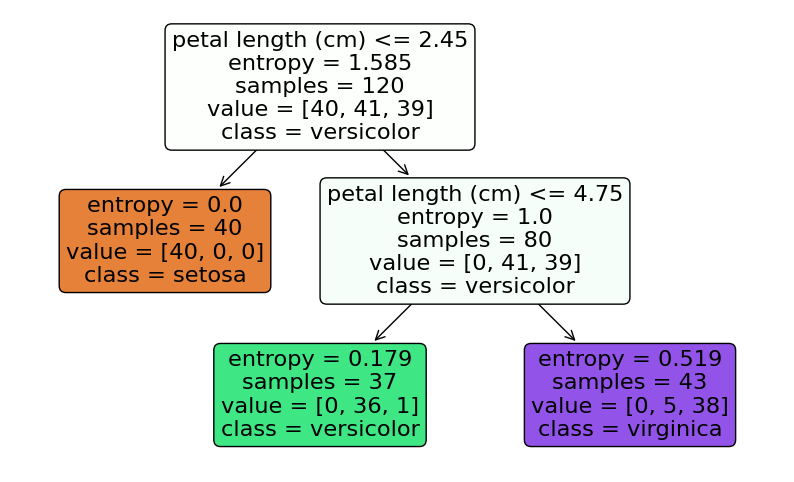

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_sklearn = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt_sklearn.fit(X_train, y_train)

dt_skl_predictions = dt_sklearn.predict(X_test)

print(f"Sklearn DT Accuracy: {accuracy_score(y_test, dt_skl_predictions):.3f}")
print(f"Sklearn DT F1-Score: {f1_score(y_test, dt_skl_predictions, average='weighted'):.3f}")

plt.figure(figsize=(10,6))
plt.title("Decision Tree Visualization - Sklearn")
plot_tree(dt_sklearn, feature_names=list(iris.feature_names), class_names=list(iris.target_names), filled=True, rounded=True)
plt.show()

In the plot above, you can see the decision rules that have been made for splitting the dataset.

## Random Forest

### Quick Review
- A **Random Forest** is an ensemble method that `combines multiple decision trees` to improve accuracy and reduce overfitting. 
- Each tree is trained on `random subsets` of the data and features, and their predictions are `averaged` for better performance.
- It’s robust, reduces variance, and works well for both classification and regression.

### Steps to Create a Random Forest
1. **Bagging**: Randomly sample subsets of the data (with replacement) for each tree.
2. For each tree, randomly select a subset of features at each split.
3. Train a decision tree on each sampled dataset.
4. Repeat steps 1–3 to build multiple decision trees.
5. **Aggregating**: For predictions, aggregate the outputs of all the trees (e.g., majority vote for classification or averaging for regression).

In [7]:
from sklearn.utils import resample

class RandomForest:
    """
    A random forest classifier for multi-class classification problems (using decision stumps with depth 1).
    """
    
    def __init__(self, n_trees=7):
        self.n_trees = n_trees
        self.trees = []

    def fit(self, X, y):
        """
        Fits a random forest to the dataset (X, y).
        """
        self.trees = []
        for _ in range(self.n_trees):
            stump = DecisionStump()
            X_sample, y_sample = self._bootstrap_samples(X, y)
            stump.fit(X_sample, y_sample)
            self.trees.append(stump)

    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        stump_predictions = np.array([stump.predict(X) for stump in self.trees])
        return self._majority_vote(stump_predictions)
    
    def _bootstrap_samples(self, X, y):
        """
        Applies bootstrap resampling to the dataset.
        """
        return resample(X, y, n_samples=len(X), replace=True)
    
    def _majority_vote(self, predictions):
        """
        Returns the majority vote of the predictions.
        """
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)


In this section, we'll use the `Breast cancer wisconsin (diagnostic)` dataset which is a binary classification dataset.

**Dataset Characteristics**:
- Number of Instances: 569
- Number of Attributes: 30 numeric, predictive attributes and the class

**Attribute Information**:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension (“coastline approximation” - 1)
- **class**:
    - WDBC-Malignant
    - WDBC-Benign

*The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.*

In [8]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X, y = breast_cancer.data, breast_cancer.target

print(f"Breast Cancer features: {breast_cancer.feature_names}")
print(f"Breast Cancer target: {breast_cancer.target_names}")

Breast Cancer features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer target: ['malignant' 'benign']


Now we can split the dataset into train and test sets. 

Also ensure that `y` is reshaped to avoid dimensional errors during model training.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (455, 30), y_train: (455,)
Shape of X_test: (114, 30), y_test: (114,)


Now we can train our custom `RandomForest()` model and evaluate its performance using both the `accuracy_score` and the `f1_score`.

In [10]:
rf_custom = RandomForest()
rf_custom.fit(X_train, y_train)

rf_cust_predictions = rf_custom.predict(X_test)

print(f"Custom RF Accuracy: {accuracy_score(y_test, rf_cust_predictions):.3f}")
print(f"Custom RF F1-Score: {f1_score(y_test, rf_cust_predictions, average='weighted'):.3f}")

Custom RF Accuracy: 0.947
Custom RF F1-Score: 0.946


### Using Scikit-learn's Random Forest Classifier
After implementing a custom Random Forest from scratch, we will now compare the results by utilizing the Scikit-learn library, which provides a highly optimized implementation of random forests. This allows us to observe the behavior of random forests without dealing with the complexities of manually building one. We’ll also visualize the decision trees used in the random forest to gain insight into how it makes decisions.

*Make sure to try different combinations of hyperparameters (n_estimators, max_depth, min_samples, etc.)*

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf_sklearn = RandomForestClassifier(n_estimators=7, max_depth=1, criterion='entropy', random_state=42)
rf_sklearn.fit(X_train, y_train.ravel())

rf_skl_predictions = rf_sklearn.predict(X_test)

print(f"Sklearn RF Accuracy: {accuracy_score(y_test, rf_skl_predictions):.3f}")
print(f"Sklearn RF F1-Score: {f1_score(y_test, rf_skl_predictions, average='weighted'):.3f}")

Sklearn RF Accuracy: 0.939
Sklearn RF F1-Score: 0.938


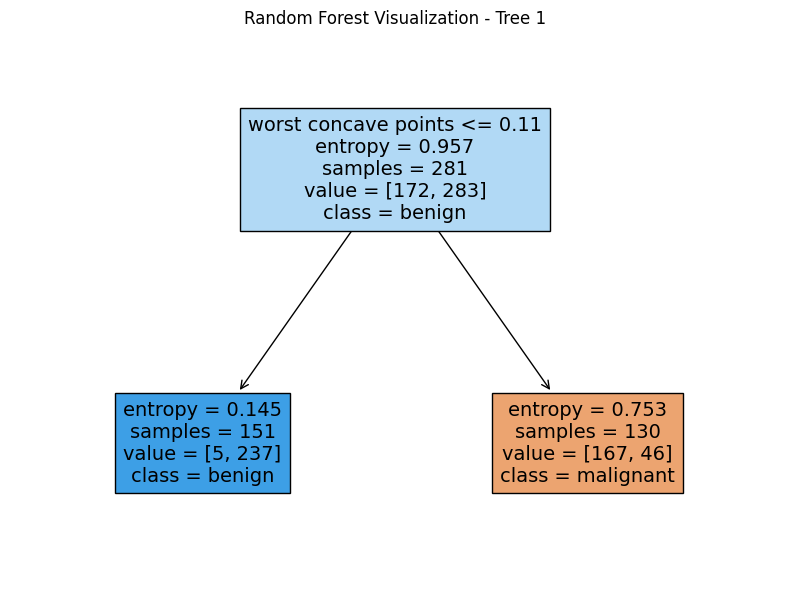

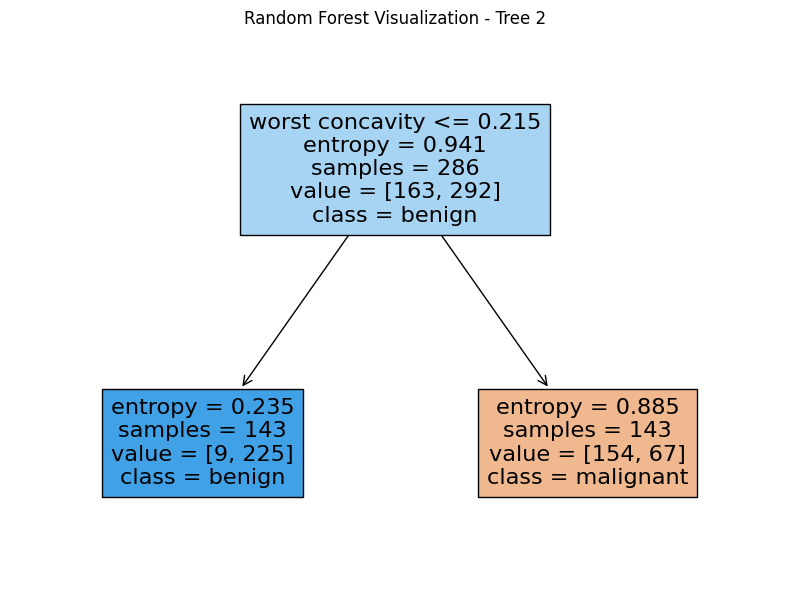

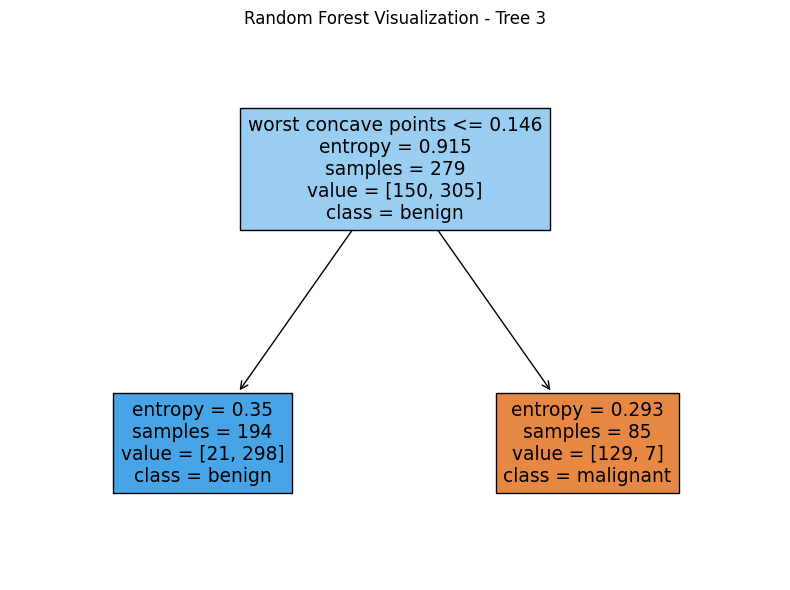

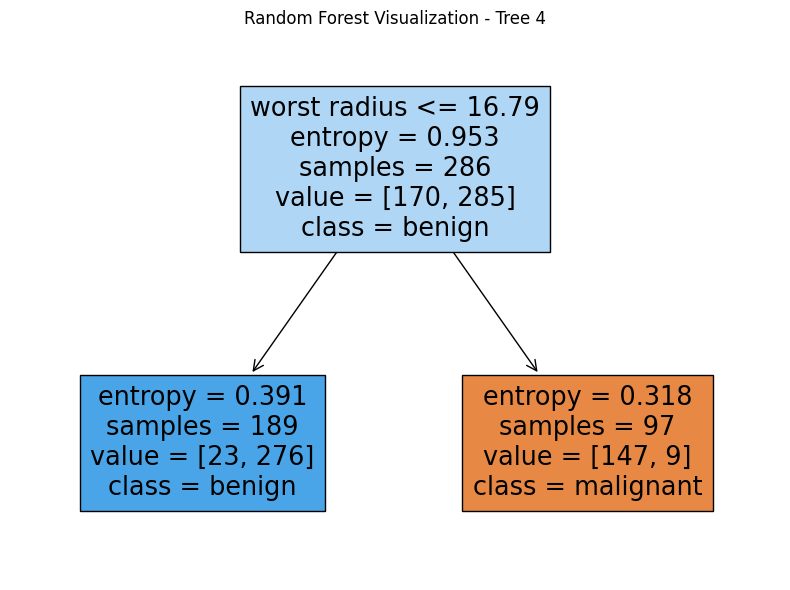

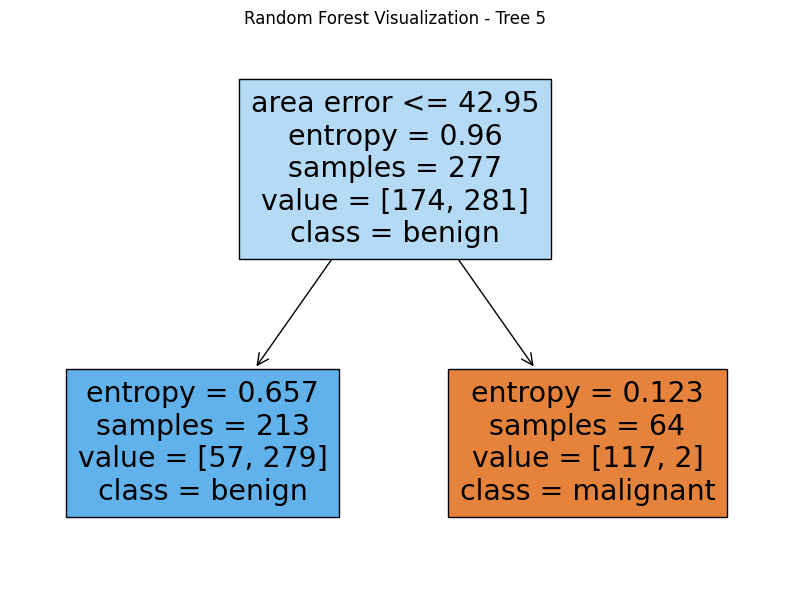

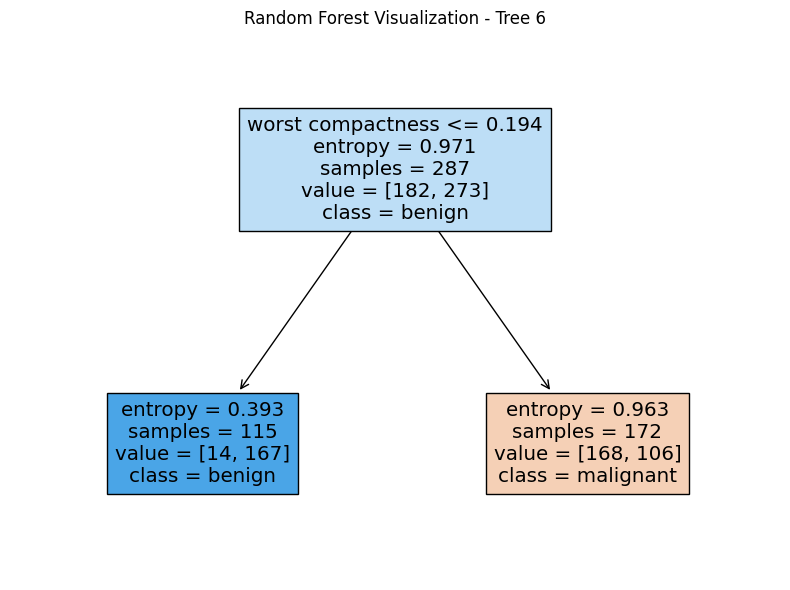

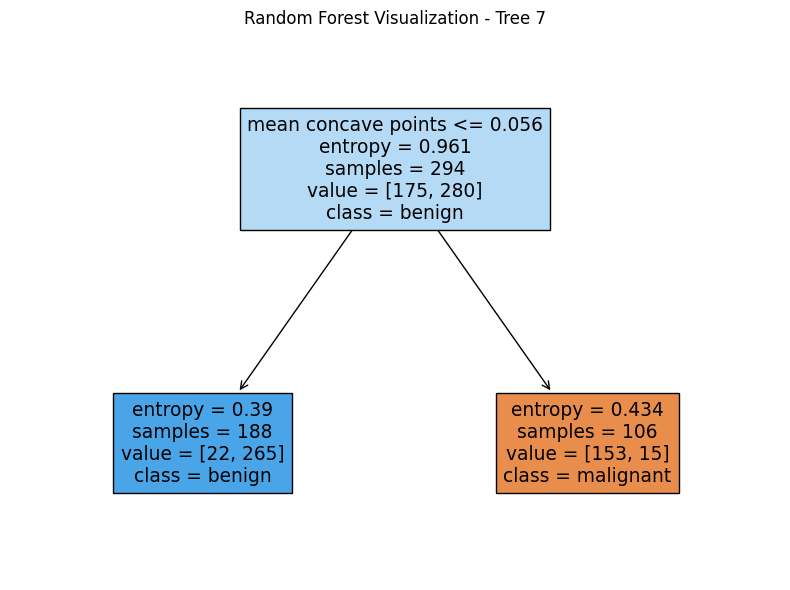

In [12]:
for idx, tree in enumerate(rf_sklearn.estimators_):
    plt.figure(figsize=(8,6))
    plot_tree(tree, filled=True, feature_names=list(breast_cancer.feature_names), class_names=list(breast_cancer.target_names))
    plt.title(f"Random Forest Visualization - Tree {idx + 1}")
    plt.tight_layout()
    plt.show()

Now choose a random sample to illustrate.

In [13]:
sample_idx = 112

pd.set_option('display.max_columns', None)
pd.DataFrame(X_test[112].reshape(1, -1), columns=breast_cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.22,27.85,92.55,623.9,0.08223,0.1039,0.1103,0.04408,0.1342,0.06129,0.3354,2.324,2.105,29.96,0.006307,0.02845,0.0385,0.01011,0.01185,0.003589,15.75,40.54,102.5,764.0,0.1081,0.2426,0.3064,0.08219,0.189,0.07796


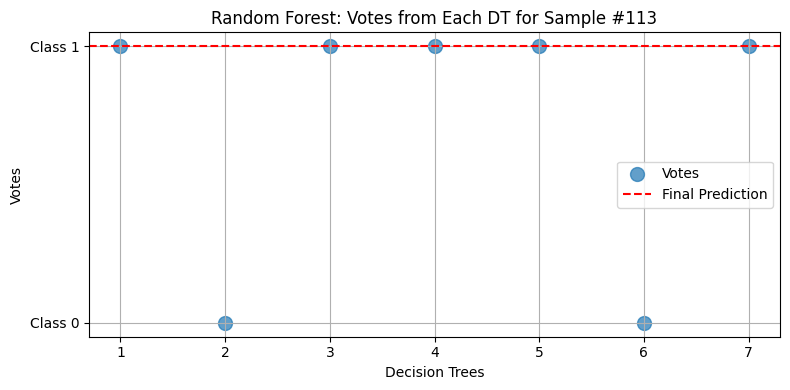

In [14]:
votes = [tree.predict(X_test[112].reshape(1, -1)) for tree in rf_sklearn.estimators_]
final_prediction = rf_sklearn.predict(X_test[sample_idx].reshape(1, -1))[0]

plt.figure(figsize=(8, 4))
plt.scatter([range(1, len(rf_sklearn.estimators_) + 1)], votes, s=100, alpha=0.7, label='Votes')
plt.axhline(y=final_prediction, color='r', linestyle='--', label='Final Prediction')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Decision Trees')
plt.ylabel('Votes')
plt.title(f'Random Forest: Votes from Each DT for Sample #{sample_idx + 1}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## XGBoost

You've learned about the `AdaBoost` algorithm in class and through the slides. Another prominent algorithm within the ensemble methods is `XGBoost`. While you may have encountered it before, you can explore more details through this [link]((https://en.wikipedia.org/wiki/XGBoost)). This algorithm builds upon the decision trees you studied earlier.

**XGBoost**, or Extreme Gradient Boosting, is an efficient and scalable implementation of the gradient boosting framework. It is widely used in machine learning competitions and practical applications due to its speed and performance. XGBoost enhances the standard gradient boosting algorithm by introducing optimizations and regularization techniques, making it robust against overfitting.

### Key Features of XGBoost:
- Parallel Processing: Utilizes parallel and distributed computing to speed up training.
- Regularization: Incorporates `L1 (Lasso)` and `L2 (Ridge)` regularization to control overfitting.
- Tree Pruning: Employs a depth-first approach to prune trees, leading to faster computations.
- Handling Missing Values: Automatically learns how to handle missing data, eliminating the need for imputation.
- Feature Importance: Provides insights into feature importance for better interpretability.


### How it works
1. **Initialization**: Starts with an initial prediction (e.g., mean value).
2. **Building Trees**: Iteratively adds decision trees to minimize the loss function.
3. **Gradient Descent**: Uses the gradients of the loss function to fit new trees, improving the model iteratively.
4. **Boosting Process**: Combines the predictions of all trees to form a strong learner, reducing bias and variance.

Below is an overview of how XGBoost works:

<dev style="text-align: center">
<img src="./assets/XGBoost.png" />
</dev>

In this section, again we'll use the `Breast cancer wisconsin (diagnostic)` dataset which is a binary classification dataset.

In [15]:
from xgboost import XGBClassifier, to_graphviz

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train.ravel())

xgb_predictions = xgb_model.predict(X_test)

print(f"XGB Accuracy: {accuracy_score(y_test, xgb_predictions):.3f}")
print(f"XGB F1-Score: {f1_score(y_test, xgb_predictions, average='weighted'):.3f}")

XGB Accuracy: 0.956
XGB F1-Score: 0.956


We can also use the built-in functions to plot the XGB decision rules.

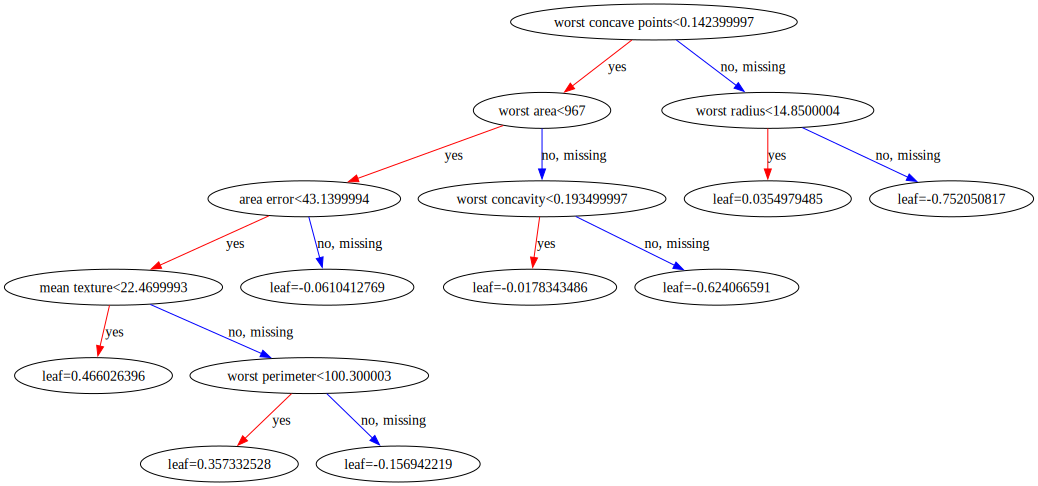

In [16]:
xgb_model.get_booster().feature_names = list(breast_cancer.feature_names)
graph = to_graphviz(xgb_model)
graph

## Comparison

First, we will utilize the `Breast Cancer Wisconsin (Diagnostic)` dataset to compare the accuracy of the two primary methods discussed earlier: `Random Forest` and `XGBoost`.

Random Forest Accuracy: 0.9561
XGBoost Accuracy: 0.9561


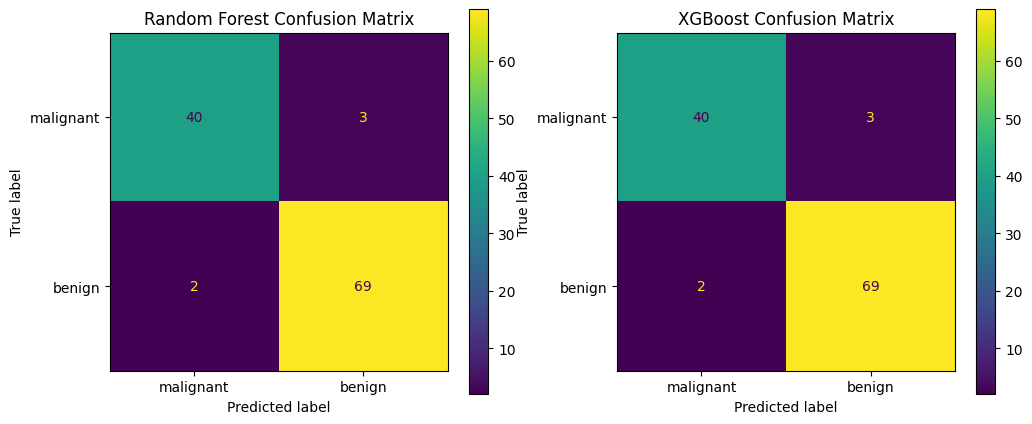


Random Forest Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

------------------------------------------------------------

XGBoost Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def test_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_predictions = rf_model.predict(X_test)

    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)

    rf_accuracy = accuracy_score(y_test, rf_predictions)
    xgb_accuracy = accuracy_score(y_test, xgb_predictions)

    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
    print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

    _, ax = plt.subplots(1, 2, figsize=(12, 5))

    cm_rf = confusion_matrix(y_test, rf_predictions)
    ConfusionMatrixDisplay(cm_rf, display_labels=list(breast_cancer.target_names)).plot(ax=ax[0])
    ax[0].set_title('Random Forest Confusion Matrix')

    cm_xgb = confusion_matrix(y_test, xgb_predictions)
    ConfusionMatrixDisplay(cm_xgb, display_labels=list(breast_cancer.target_names)).plot(ax=ax[1])
    ax[1].set_title('XGBoost Confusion Matrix')

    plt.show()

    print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions, target_names=list(breast_cancer.target_names)))
    print("-" * 60)
    print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_predictions, target_names=list(breast_cancer.target_names)))

test_dataset(X, y)

We can see that they have a quite similar performance in simple and `balanced` datasets like the one above.

But there are many proofs that XGBoost works much better than the Random Forest, when we're working with `more complicated` or `imbalanced` datasets. Below we can compare them again on a different and more complicated dataset.

For this task, we'll use three different imbalanced datasets which are located in the "./assets/imbalanced_datasets" directory.

In [18]:
pd1 = pd.read_csv("./assets/imbalanced_datasets/1.csv")
pd2 = pd.read_csv("./assets/imbalanced_datasets/2.csv")
pd3 = pd.read_csv("./assets/imbalanced_datasets/3.csv")

print(f"Shape of the first dataset: {pd1.shape}")
print(f"Shape of the second dataset: {pd2.shape}")
print(f"Shape of the third dataset: {pd3.shape}")

Shape of the first dataset: (725, 14)
Shape of the second dataset: (625, 14)
Shape of the third dataset: (525, 14)


In [19]:
X1, y1 = pd1.drop(columns=['target']), pd1['target']
X2, y2 = pd2.drop(columns=['target']), pd2['target']
X3, y3 = pd3.drop(columns=['target']), pd3['target']

Test the first dataset:

Random Forest Accuracy: 0.9793
XGBoost Accuracy: 0.9862


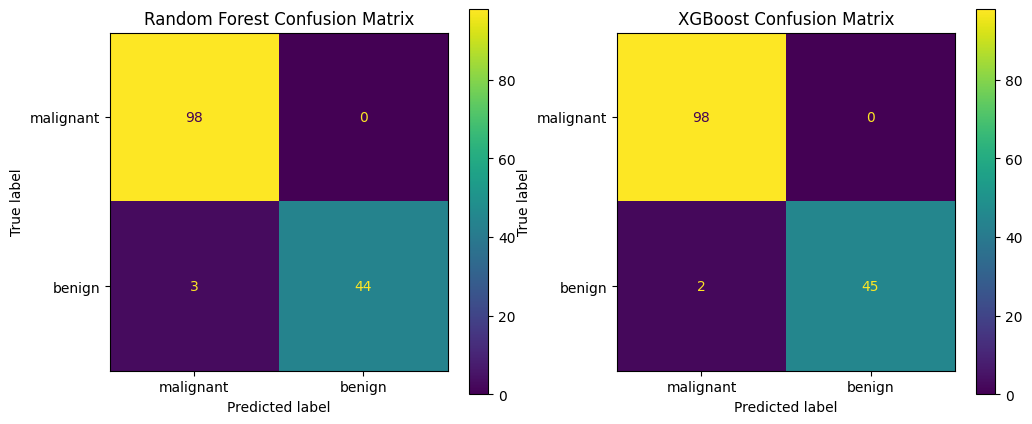


Random Forest Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      1.00      0.98        98
      benign       1.00      0.94      0.97        47

    accuracy                           0.98       145
   macro avg       0.99      0.97      0.98       145
weighted avg       0.98      0.98      0.98       145

------------------------------------------------------------

XGBoost Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      1.00      0.99        98
      benign       1.00      0.96      0.98        47

    accuracy                           0.99       145
   macro avg       0.99      0.98      0.98       145
weighted avg       0.99      0.99      0.99       145



In [20]:
test_dataset(X1, y1)

Random Forest Accuracy: 0.9360
XGBoost Accuracy: 0.9440


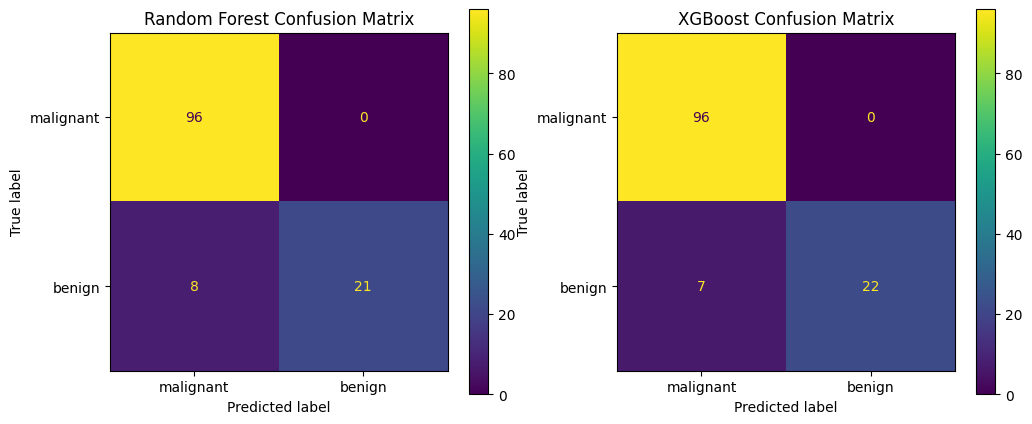


Random Forest Classification Report:
               precision    recall  f1-score   support

   malignant       0.92      1.00      0.96        96
      benign       1.00      0.72      0.84        29

    accuracy                           0.94       125
   macro avg       0.96      0.86      0.90       125
weighted avg       0.94      0.94      0.93       125

------------------------------------------------------------

XGBoost Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      1.00      0.96        96
      benign       1.00      0.76      0.86        29

    accuracy                           0.94       125
   macro avg       0.97      0.88      0.91       125
weighted avg       0.95      0.94      0.94       125



In [21]:
test_dataset(X2, y2)

Random Forest Accuracy: 0.9905
XGBoost Accuracy: 0.9905


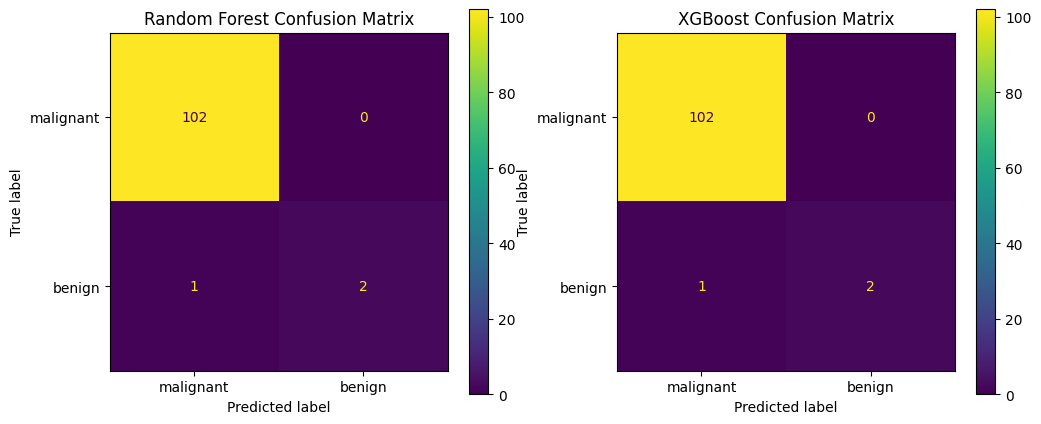


Random Forest Classification Report:
               precision    recall  f1-score   support

   malignant       0.99      1.00      1.00       102
      benign       1.00      0.67      0.80         3

    accuracy                           0.99       105
   macro avg       1.00      0.83      0.90       105
weighted avg       0.99      0.99      0.99       105

------------------------------------------------------------

XGBoost Classification Report:
               precision    recall  f1-score   support

   malignant       0.99      1.00      1.00       102
      benign       1.00      0.67      0.80         3

    accuracy                           0.99       105
   macro avg       1.00      0.83      0.90       105
weighted avg       0.99      0.99      0.99       105



In [22]:
test_dataset(X3, y3)

We can see that overall, XGBoost performs better on imbalanced datasets. 

But keep in mind that both of them are very strong classifiers, and we can use different methods like hyperparameter optimization, ... to make them even stronger. e.g. Even on these imbalanced datasets, we can use higher number of estimators for the Random Forest to make its accuracy better than XGBoost.